<a href="https://colab.research.google.com/github/CJKILG1/IT262_Course_Material/blob/CameronK_ParetoChart/CameronK_ParetoChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       reason                         description  frequency
0         ERP                    myIllinoinsState          7
1         VPN                connection from home         10
2       email                   unable to message         18
3         PCs  office computers for staff/faculty         12
4     printer                     unable to print         10
5    internet                   connection issues         22
6   ReggieNet            issues accesing features          8
7      mobile       mobile devices not connecting         14
8    password               password reset issues         11
9        VoIP  phone / voice message difficulties         15
10   hardware             general hardware issues         25
11  Office365             question accessing apps         13


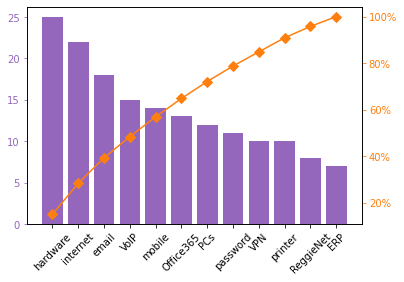

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Section 1: Create a table with four columns
# Mount google drive via Collab GUI and read "HelpDesk.csv" file
df=pd.read_csv("/content/drive/MyDrive/IT262/HelpDesk.csv")
print(df)

# Section 2: Sort descending based on frequencies
# set this column as index - to use as plot labels
df.index = df["reason"]
# descending sort
df = df.sort_values(by="frequency",ascending=False)

#Section 3: Create a cumulative percentage column
# cumulative percentage column is created using cumsum function
df["cumulativePercentage"] = df["frequency"].cumsum()/df["frequency"].sum()*100

# making sure only 2 decimal points are shown
df["cumulativePercentage"] = df["cumulativePercentage"].apply(lambda x: round(x,2))

# Section 4: Plot bar chart of frequencies and the cumulative curve

fig, ax = plt.subplots() 
ax.bar(df.index, df["frequency"], color="C4") 

#show labels diagonally 
ax.set_xticklabels( df["reason"], rotation=45 ) 
#ax2 and axl will be shown at the same time with twinx 
ax2 = ax.twinx() 

ax2.plot(df.index, df["cumulativePercentage"], color="C1", marker="D", ms=7) 
ax2.yaxis.set_major_formatter(PercentFormatter()) 

ax.tick_params(axis="y", colors="C4") 
ax2.tick_params(axis="y", colors="C1") 
plt.xticks(rotation=45, ha="right") 
plt.show() 